In [1]:
import numpy as np

In [2]:
x_train = np.load('x_train_gray.npy',allow_pickle=True)
x_test = np.load('x_test_gray.npy',allow_pickle=True)
y_train = np.load('y_train_gray.npy',allow_pickle=True)
y_test = np.load('y_test_gray.npy',allow_pickle=True)

In [3]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(17835, 128, 128) (17835, 15) (4459, 128, 128) (4459, 15)


In [4]:
x_train, x_test = x_train.reshape((-1,128,128,1)), x_test.reshape((-1,128,128,1))

In [5]:
from keras.layers import Conv2D , Dense , Activation , MaxPool2D ,Flatten , BatchNormalization , Dropout
from keras.models import Sequential

In [6]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , input_shape = (128,128,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('sigmoid'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(15))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [7]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

In [8]:
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

In [9]:
#Randomly Initializing Weights
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [10]:
# Training
hist = model.fit(x_train , y_train,
         shuffle=True,
         epochs = 40,
         batch_size=128,
         validation_data=(x_test,y_test),
         callbacks=callback_early_stop_reduceLROnPlateau)

Epoch 1/40
140/140 [==============================] - 251s 2s/step - loss: 2.0663 - accuracy: 0.3315 - val_loss: 1.4634 - val_accuracy: 0.5371
Epoch 2/40
140/140 [==============================] - 257s 2s/step - loss: 1.3194 - accuracy: 0.5738 - val_loss: 1.1295 - val_accuracy: 0.6266
Epoch 3/40
140/140 [==============================] - 254s 2s/step - loss: 0.9521 - accuracy: 0.6920 - val_loss: 0.9402 - val_accuracy: 0.6921
Epoch 4/40
140/140 [==============================] - 258s 2s/step - loss: 0.6841 - accuracy: 0.7727 - val_loss: 0.6049 - val_accuracy: 0.8015
Epoch 5/40
140/140 [==============================] - 291s 2s/step - loss: 0.4920 - accuracy: 0.8408 - val_loss: 0.5506 - val_accuracy: 0.8139
Epoch 6/40
140/140 [==============================] - 294s 2s/step - loss: 0.3580 - accuracy: 0.8865 - val_loss: 0.5032 - val_accuracy: 0.8311
Epoch 7/40
140/140 [==============================] - 299s 2s/step - loss: 0.2616 - accuracy: 0.9189 - val_loss: 0.5238 - val_accuracy: 0.8264

In [11]:
import matplotlib.pyplot as plt

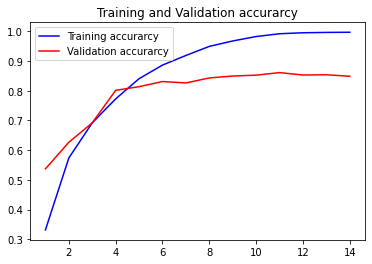

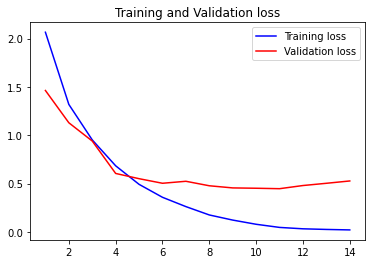

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [13]:
print("model accuracy")
scores = model.evaluate(x_test, y_test)
print('Accuracy :- ' , scores[1] , ' , Loss :- ' , scores[0])

model accuracy
140/140 [==============================] - 16s 114ms/step - loss: 0.4470 - accuracy: 0.8612- ETA: 0s - loss: 0.4483 - 
Accuracy :-  0.8611796498298645  , Loss :-  0.44704169034957886


In [14]:
preds = model.predict(x_test)
preds.shape

(4459, 15)

In [41]:
yhat = [np.argmax(i) for i in preds]

In [42]:
np.shape(yhat)

(4459,)

In [43]:
actual_output = [np.argmax(i) for i in y_test]

In [44]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns

<AxesSubplot:>

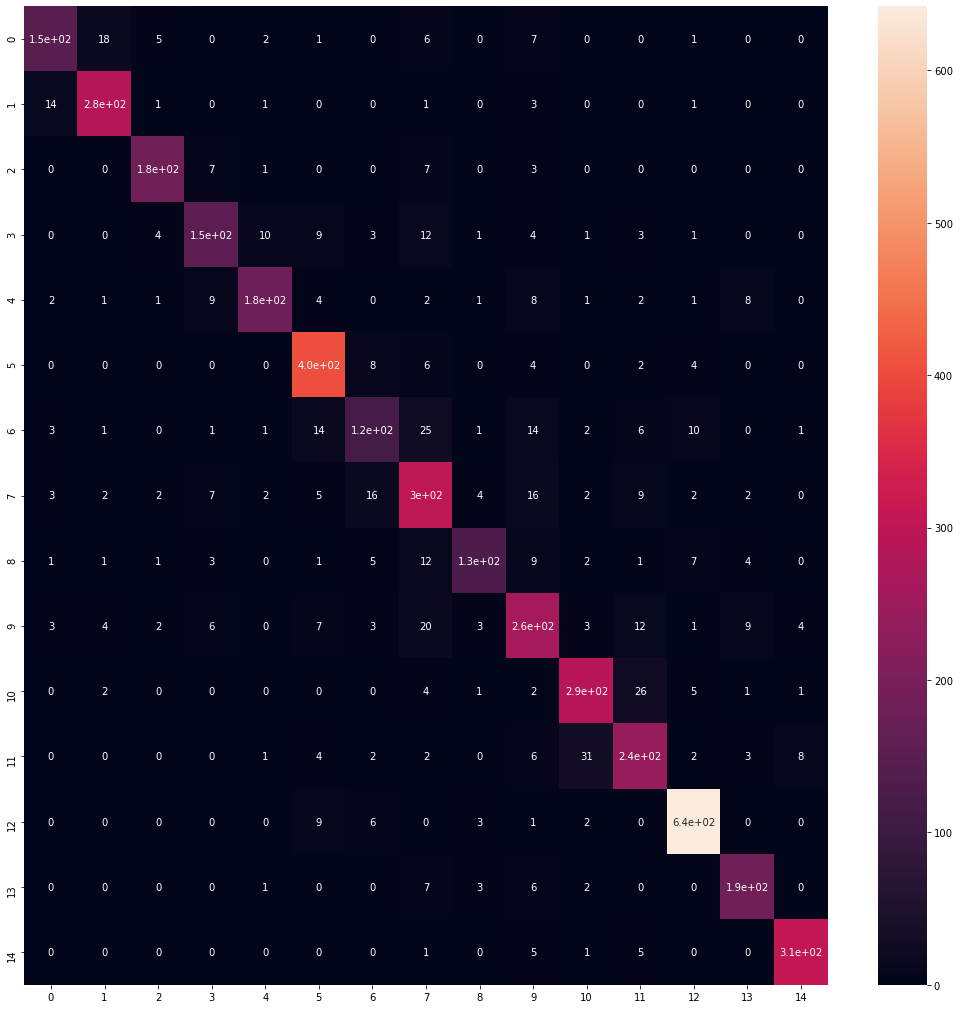

In [45]:
plt.figure(figsize=(18,18))
confusion = confusion_matrix(actual_output,yhat)
sns.heatmap(confusion, annot=True , xticklabels=True , yticklabels=True)

In [46]:
print("Confusion Matrix \n")
print(confusion_matrix(actual_output,yhat),'\n')
print('\n Classification Report\n')
print(classification_report(actual_output,yhat))

Confusion Matrix 

[[148  18   5   0   2   1   0   6   0   7   0   0   1   0   0]
 [ 14 285   1   0   1   0   0   1   0   3   0   0   1   0   0]
 [  0   0 185   7   1   0   0   7   0   3   0   0   0   0   0]
 [  0   0   4 153  10   9   3  12   1   4   1   3   1   0   0]
 [  2   1   1   9 181   4   0   2   1   8   1   2   1   8   0]
 [  0   0   0   0   0 405   8   6   0   4   0   2   4   0   0]
 [  3   1   0   1   1  14 116  25   1  14   2   6  10   0   1]
 [  3   2   2   7   2   5  16 302   4  16   2   9   2   2   0]
 [  1   1   1   3   0   1   5  12 128   9   2   1   7   4   0]
 [  3   4   2   6   0   7   3  20   3 265   3  12   1   9   4]
 [  0   2   0   0   0   0   0   4   1   2 293  26   5   1   1]
 [  0   0   0   0   1   4   2   2   0   6  31 242   2   3   8]
 [  0   0   0   0   0   9   6   0   3   1   2   0 642   0   0]
 [  0   0   0   0   1   0   0   7   3   6   2   0   0 188   0]
 [  0   0   0   0   0   0   0   1   0   5   1   5   0   0 307]] 


 Classification Report

        

In [47]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [48]:
def reversal_of_one_hot(y_data):
    actual_output = []
    for y in y_data:
        actual_output.append(y.argmax())
    return np.array(actual_output)

In [49]:
from keras.utils import to_categorical

c:\users\captan pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


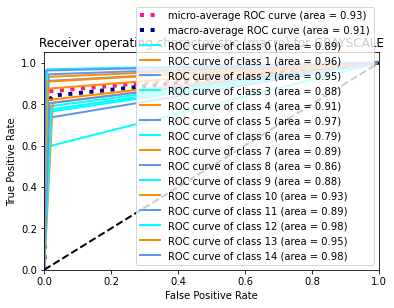

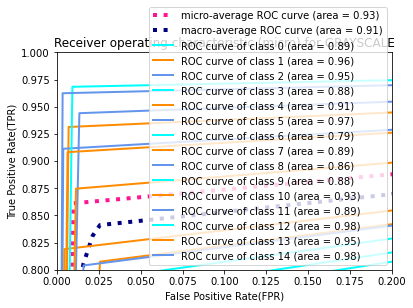

In [60]:
Fpr = dict()
Tpr = dict()

y_test = to_categorical(y_test)
# yhat = to_categorical(yhat)
lw = 2

Roc_auc = dict()
for i in range(15):
    Fpr[i], Tpr[i], _ = roc_curve(y_test[:, i],yhat[:, i])
    Roc_auc[i] = auc(Fpr[i], Tpr[i])
    
    
Fpr["micro"], Tpr["micro"], _ = roc_curve(y_test.ravel(), yhat.ravel())
Roc_auc["micro"] = auc(Fpr["micro"], Tpr["micro"])


all_Fpr = np.unique(np.concatenate([Fpr[i] for i in range(15)]))

mean_Tpr = np.zeros_like(all_Fpr)
for i in range(15):
    mean_Tpr += interp(all_Fpr, Fpr[i], Tpr[i])

mean_Tpr /= 15

Fpr["macro"] = all_Fpr
Tpr["macro"] = mean_Tpr
Roc_auc["macro"] = auc(Fpr["macro"], Tpr["macro"])

plt.figure(1)
plt.plot(Fpr["micro"], Tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(Roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(Fpr["macro"], Tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(Roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(15), colors):
    plt.plot(Fpr[i], Tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, Roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (macro) for GRAYSCALE')
plt.legend(loc="lower right")
plt.show()


plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(Fpr["micro"], Tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(Roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(Fpr["macro"], Tpr["macro"], label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(Roc_auc["macro"]), color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(15), colors):
    plt.plot(Fpr[i], Tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, Roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver operating characteristic (micro) for GRAYSCALE')
plt.legend(loc="lower right")
plt.show()

In [50]:
print(y_test.shape)


(4459, 15)


In [52]:
print(yhat.shape)

AttributeError: 'list' object has no attribute 'shape'